In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# check_line_list = [3,103,203,303,403,503,603,703,803,903,1003,1122]
check_line_list = [3,103,203,303,403,503,603,703,803,903]
# check_line_list = [3,103,203,303,403]
# check_line_list = [3,603,703,803,903]
plt_hight = 4.5
bar_width = 0.4
save_root_path = 'statistics_model_efficiency_pruned_quantized_model/'
rld = databaseloader(file_path='../log/arc3_test_model_running_effciency_cpu_quantized_model.xls', sheet_index = 3)
c = calculator()
x_lable = ['resnet50_float', 'resnet50_pruning_0.2_remain', 'resnet50_pruning_0.4_remain', 'resnet50_pruning_0.6_remain', 'resnet50_pruning_0.7_remain', 'resnet50_quantization', 'resnet50_0.2_remain_quantization', 'resnet50_0.4_remain_quantization', 'resnet50_0.6_remain_quantization', 'resnet50_0.7_remain_quantization']
# x_lable = ['resnet50_float', 'resnet50_pruning_0.2_remain', 'resnet50_pruning_0.4_remain', 'resnet50_pruning_0.6_remain', 'resnet50_pruning_0.7_remain']
# x_lable = ['resnet50_float', 'resnet50_0.2_remain_quantization', 'resnet50_0.4_remain_quantization', 'resnet50_0.6_remain_quantization', 'resnet50_0.7_remain_quantization']


In [2]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[127.908714, 101.685585, 137.91544, 198.9284, 212.19215, 54.308556, 22.005781, 26.322851, 32.23258, 38.593243]
[0.4123576200781258, 0.8806645713718382, 0.8501053866376935, 1.1414904886477188, 3.297344116000602, 1.123891708769456, 1.1344375190956946, 1.5990658666745645, 1.7577766060543567, 1.4509478239653717]
[127.88453192090667, 101.49766748400077, 137.79996984297105, 198.79353757436655, 211.21365848967852, 53.06672964337509, nan, nan, 26.878891927327377, 36.714337029203115]
[0.4162528107466841, 0.8889834583124809, 0.858135607029169, 1.1522731755271138, 3.3284913130119094, 1.1345081549882678, nan, nan, 1.7743808221520894, 1.4646536903039546]


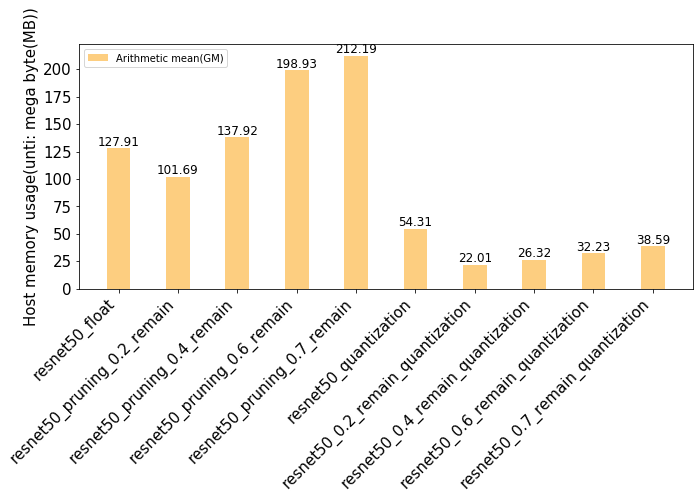

In [3]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_mean_list, bar_width, color=(254/256, 207/256, 128/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Arithmetic mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Host memory usage(unti: mega byte(MB))',fontsize = 15)
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

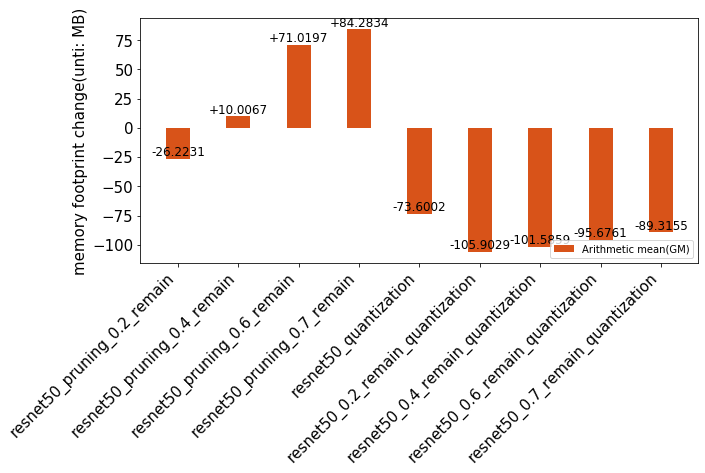

In [4]:
#  memory footprint compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_mean_list[0]
resnet50_loss_accuracy = np.array(model_mean_list[1:]) - resnet50_float_accuarcy
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    if b > 0:
        plt.text(x_axis, b+0.0015, '+' + str(round(b, 4)), ha='center', va='bottom', fontsize=12)
    else:
        plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Arithmetic mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('memory footprint change(unti: MB)',fontsize = 15)
plt.savefig(save_root_path + "memory footprint change.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [5]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[2.0651243, 2.1908698, 1.785978, 1.8736489, 1.9171109, 2.2456348, 2.5641963, 2.6066768, 2.7521381, 2.8761919]
[0.012279345737186365, 0.8140794919035623, 0.017714268180302195, 0.019541464945144194, 0.021609028160915145, 0.014699862783976503, 0.033183230412442644, 0.022611279794261474, 0.032212279246199405, 0.08441771799917497]
[2.0638611855367284, 1.753797050728503, 1.7831167757569957, 1.8701033552764819, 1.9132137330898833, 2.2439785121341935, 2.5573842175622943, 2.603384566592254, 2.7458737147505707, 2.845771646017946]
[0.012395338241272036, 0.821769406399946, 0.017881599760359412, 0.019726056494319355, 0.021813150216021482, 0.014838719847741988, 0.03349668408265938, 0.022824869265561265, 0.03251656116903412

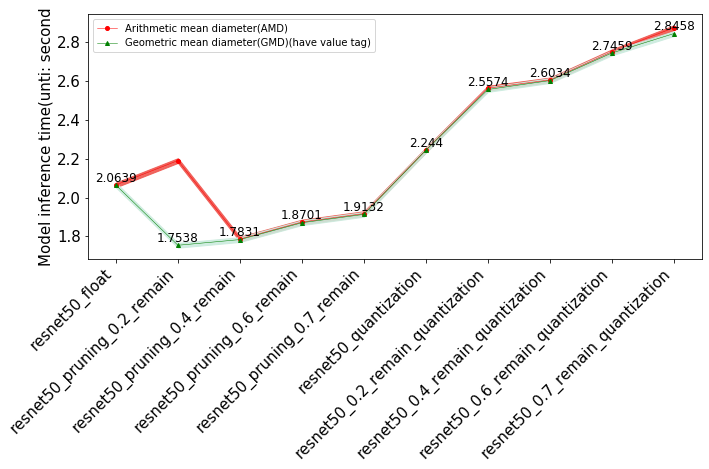

In [6]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Model inference time(unti: second',fontsize = 15)
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

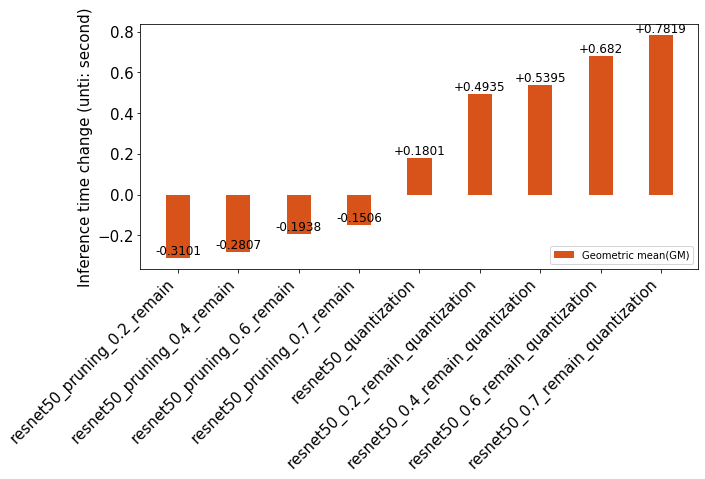

In [7]:
#  Inference time compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_geo_mean_list[0]
resnet50_loss_accuracy = np.array(model_geo_mean_list[1:]) - resnet50_float_accuarcy
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    if b > 0:
        plt.text(x_axis, b+0.0015, '+' + str(round(b, 4)), ha='center', va='bottom', fontsize=12)
    else:
        plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Inference time change (unti: second)',fontsize = 15)
plt.savefig(save_root_path + "Inference time change.png",dpi=500,bbox_inches = 'tight')

In [8]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['resnet50', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50_quantization', 'sketch_resnet50_0.2_quantization', 'sketch_resnet50_0.4_quantization', 'sketch_resnet50_0.6_quantization', 'sketch_resnet50_0.7_quantization']
[38.211304, 31.884258, 34.080338, 24.890944, 26.208384, 16.68079, 42.026844, 56.28707, 73.10751, 83.91789]
[0.050249319148299776, 0.18476019014830314, 0.043729875367517934, 0.025874087336777762, 0.019870125590987442, 0.012537217982650617, 0.021557038471009093, 0.03229452620026052, 0.021324224293934435, 0.025551749315411598]
[38.21009313285201, 31.868045841425385, 34.079316417023776, 24.89045988253663, 26.208108481562547, 16.68061735389052, 42.026642952433676, 56.28673431910438, 73.10740106421125, 83.91774667337634]
[0.05072398160029934, 0.1865054620519757, 0.0441429541956353, 0.02611849776754127, 0.020057821716914503, 0.012655646385859143, 0.021760669423869672, 0.032599585039911005, 0.021525656049874442, 0.02

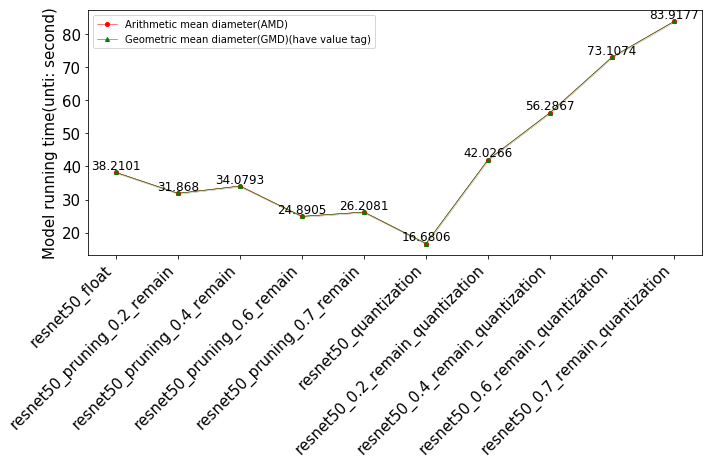

In [9]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)



x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Model running time(unti: second)', fontsize = 15)
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()

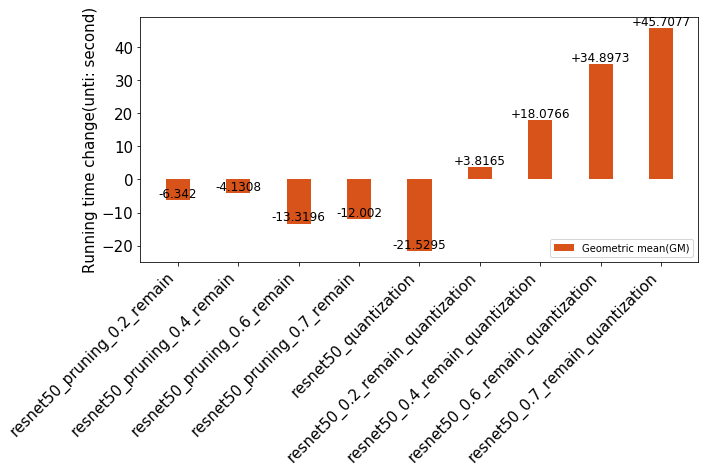

In [10]:
#  Running time compare with ResNet50_float
x_loss_lable = x_lable[1:]
x = np.arange(0,len(x_loss_lable))
plt.figure(figsize=(len(x_loss_lable)+1,plt_hight))
resnet50_float_accuarcy = model_geo_mean_list[0]
resnet50_loss_accuracy = np.array(model_geo_mean_list[1:]) - resnet50_float_accuarcy
bar = plt.bar(x, resnet50_loss_accuracy, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_loss_lable, resnet50_loss_accuracy):
    if b > 0:
        plt.text(x_axis, b+0.0015, '+' + str(round(b, 4)), ha='center', va='bottom', fontsize=12)
    else:
        plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_loss_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Running time change(unti: second)',fontsize = 15)
plt.savefig(save_root_path + "Running time change.png",dpi=500,bbox_inches = 'tight')